# Übung 1: Diskretisierung

**Name:** Faiz Akbar Daud, **Matr.-Nr.:** 552351
<br>
**Name:** Hatem Al-Tayi, **Matr.-Nr.:** 557187

---

## Bearbeitungszeitraum

**Bearbeitungsbeginn:** Mo, 31.10.2019
<br>
**Abgabe:** So, 20.11.2019, 23:55 Uhr

---

## Aufgabenbeschreibung

Ziel dieser Übung ist die Einführung in die Bildverarbeitung mit Python. Sie sollen Bilder einlesen, visualisieren und konvertieren können. Zudem sollen Sie lernen, wie Farb-/Grauwerte eines Bildes manipuliert werden können. 
Sie sollen sich zur Bearbeitung dieser Aufgabe mit den bereits vorgestellten imaging libraries beschäftigen und sie einsetzen.

Für die Visualisierung kann das *matplotlib*-Paket verwendet werden. Alle Diagramme sollen *inline* in diesem Notebook ausgegeben werden. Alle interaktiven Inhalte sollen unter Venwendung der Funktionen des Pakets *ipywidgets* realisiert werden.


**Hinweise zur Abgabe**

- Füllen Sie unbedingt die erste Zelle unterhalb der Überschrift mit Name und Matr.-Nr. aus!
- Ergänzen Sie den Dateinamen des Notebooks vor der Abgabe um `_` und Ihre Matr.-Nr. (`Uebung 1 - Biosignale_s0500000_s0500001.ipynb`).
- Entfernen Sie vor dem Upload alle Ausgaben aus dem Notebook!
- Die Bilddatei muss nicht abgegeben werden.

**Hinweise zur Benotung**

- Die Aufgabe wird nach dem üblichen Notenschema von 1,0 bis 5,0 bewertet.
- Diese Aufgabe wird mit 25% in der Gesamtnote der Übung gewichtet.

### Viel Erfolg!

### 1. Einlesen, Visualisierung und Konvertierung 
- 1.1. Lesen sie die Datei "Schwarm.jpg" ein.
Visualisieren Sie das, in der Datei enthaltene Bild (verwenden Sie die Funktionen `imshow` und `show`). Optional kann auch die cv2.imread-Funktion benutzt werden.
- 1.2. Führen Sie eine einfache, Schwellwert-basierte Konvertierung des Originalbildes durch, in dem Sie die `threshold`- Funktion (mit dem input value `cv2.THRESH_BINARY`) aus der `cv2`-Bibliothek verwenden. 
Visualisieren Sie beide Bilder mit Hilfe der `subplot`-Funktion in einer Zeile dar.
- 1.3. Analysieren Sie die Array-Werte des neu erzeugten Bildes. Was hat die Thresholding-Funktion bewirkt? Nach welchem Kriterium wurden die einzelnen Pixelwerte verändert? (Stichpunktartige Antwort)

***Anmerkung:*** Nachdem Sie bei der ersten Aufgabe BGR in ein GRAY-Bild umgewandelt haben, denken Sie dran plt.imshow(image, cmap='binary‘) zu setzen, damit das Bild nicht in gelb/lila dargestellt wird.

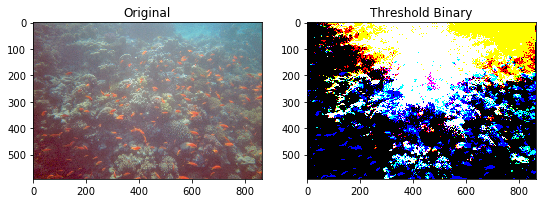

In [6]:
import matplotlib.pyplot as plt
import cv2

image = cv2.imread("Schwarm.jpg")
plt.figure(figsize=(9,5))

ret,thresh1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(1, 2, 2), plt.imshow(thresh1)
plt.title("Threshold Binary")

plt.show()

### 2. Binärbild erzeugen

**Interaktive Threshold-Eingabe** 

Das Ziel dieser Aufgabe ist es, aus dem farbigen "Schwarm.jpg" ein Binärbild (also ein s/w-Bild!) zu erzeugen, da Binärbilder die Grundvoraussetzung von vielen Bildverarbeitungsoperationen sind.
Bildverarbeitungsbibliotheken wie `scipy` bieten bereits robuste Schwellwert-basierte Funktionen, die Sie sich gerne anschauen und auch testweise anwenden können. 
Für diese Teilaufgabe sollten Sie jedoch einen Slider implementieren, über den ein Schwellenwert (Grenzen 0 und 255, Schrittweite 1, Standardwert 127) für eine Binärkonvertierung festgelegt werden kann. Konvertieren Sie Originalbild unter Verwendung des Schwellenwertes in ein Binärbild. Eine einfache Konvertierung kann durch folgende Zeile erreicht werden: binary_image = (image >= schwellenwert) * 1. 

***Hinweis:*** 
Nutzen Sie die Funktionen zur Erstellung einer interaktiven Visualisierung aus dem ipywidgets-Paket (siehe auch Demo-Notebook -> Beispiel Gauss-Filter).

In [7]:
from io import BytesIO
from IPython.display import Image
from ipywidgets import interact, fixed
import matplotlib as mpl
from skimage import data, filters, io

In [8]:
# Hilfsfunktion zur Konvertierung eines Numpy-Arrays in ein 'Image'-Objekt

def arr2img(arr):
    if arr.ndim == 2:
        format, cmap = 'png', mpl.cm.gray
    elif arr.ndim == 3:
        format, cmap = 'jpg', None
    else:
        raise ValueError("Only 2- or 3-d arrays can be displayed as images.")
    vmax = 255 if arr.dtype == 'uint8' else 1.0
    with BytesIO() as buffer:
        mpl.image.imsave(buffer, arr, format=format, cmap=cmap, vmin=0, vmax=vmax)
        out = buffer.getvalue()
    return Image(out)

In [9]:
def edit_image(image, Threshold=127):
    ret, gray = cv2.threshold(image,Threshold,255,cv2.THRESH_BINARY)
    return arr2img(gray)

In [11]:
# Interaktiv wäre doch viel besser !!!
from IPython.display import display
import ipywidgets as widgets
img = cv2.imread("Schwarm.jpg",0)
# Parameter-Grenzen, wobei die Änderung des Parameters nur
# bei mouse release events an die Funktion übergeben werden.
# Sinnvoll bei Funktionen mit langer Laufzeit! (hier nur als Beispiel)
thresh_limit = widgets.FloatSlider(value=127, min=0, max=255, step=1, continuous_update=True)

# Interaktives Widget initialisieren und ausführen
# image=fixed(img) - der Parameter image der Funktion edit_image soll nicht verändert werden

interact(edit_image, image=fixed(img), Threshold=thresh_limit);

interactive(children=(FloatSlider(value=127.0, description='Threshold', max=255.0, step=1.0), Output()), _dom_…

# 3. Diskretisierung

Bearbeiten Sie das Originalbild "Schwarm.jpg", indem Sie folgende Operationen durchführen:

- 3.1. Anzahl der Graustufen reduzieren (4 Stufen: 128, 64, 32, 16). Nehmen Sie hier als Ausgangsbild das Grauwert-transformierte Originalbild.
- 3.2. Anzahl der Bildpunkte reduzieren (512x512, 256x256, 128x128, 32x32) 
- 3.2. Anzahl der Farbstufen reduzieren (in 4 Stufen)

Visualisieren Sie diese Teilaufgaben jeweils mit Hilfe der `subplot`-Funktion in einem 2x2-Raster.

***Hinweis:*** 
- Es ist Ihnen überlassen, welche Libraries bzw. welche Funktionen Sie hierfür verwenden. Wichtig ist, dass Sie die Vorgehensweise der eingesetzten Algorithmen nachvollziehen und wiedergeben können!
- Beschreiben Sie bei jeder Teilaufgabe den Ablauf Ihres Algorithmus (stichpunktartige Wiedergabe reicht aus)
- Sie dürfen auch die, in der Vorlesung vorgestellten Algorithmen `Fehlerdiffusion` und `Median Cut` einsetzen, um vorallem eine Grau-/Farbwertreduktion durchzuführen

Text(0.5, 1.0, 'Grayscale = 16')

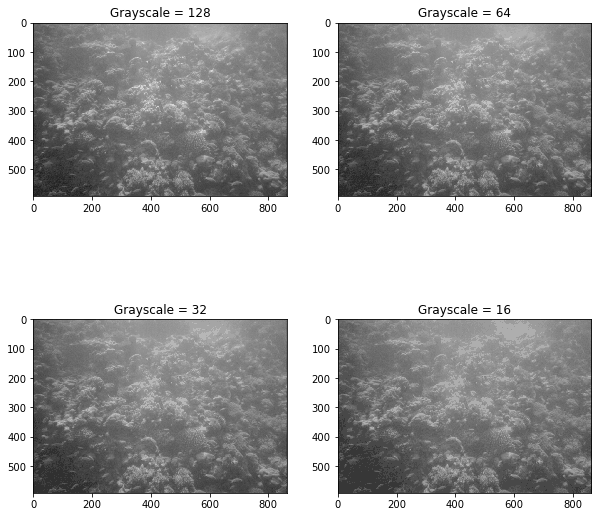

In [12]:
# Importing Image module from PIL package  
from PIL import Image  
import PIL  
from PIL import ImageOps
image = Image.open("Schwarm.jpg")  
# creating a image object (main image)  
grey =PIL.ImageOps.grayscale(image)
# quantize a image  
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1), plt.imshow((grey.quantize(128)))
plt.title("Grayscale = 128")
plt.subplot(2, 2, 2),plt.imshow(grey.quantize(64))
plt.title("Grayscale = 64")
plt.subplot(2, 2,3), plt.imshow(grey.quantize(32))
plt.title("Grayscale = 32")
plt.subplot(2, 2,4),plt.imshow(grey.quantize(16))
plt.title("Grayscale = 16")
